In [2]:
!pip install numpy
!pip install scikit-learn 
!pip install matplotlib

DEPRECATION: pytorch-lightning 1.5.6 has a non-standard dependency specifier torch>=1.7.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.5.6 has a non-standard dependency specifier torch>=1.7.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e7/e3/c82963a3b86d6e6d5874cbeaa390166458a7f1961bab9feb14d3d1a10f02/matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64

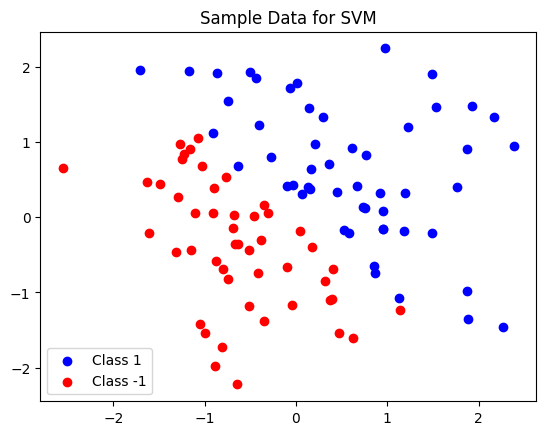

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

#Generate sample data 
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

#plot the data 
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', label= 'Class 1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', label= 'Class -1')
plt.legend()
plt.title('Sample Data for SVM')
plt.show()



In [ ]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report 

#split to training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create classifier 
svm_classifier = SVC(kernel='linear', random_state=42) #'linear', 'rbf', 'poly'

#train 
svm_classifier.fit(X_train, y_train)

#test 
y_pred = svm_classifier.predict(X_test)
print(y_pred)

#evaluate 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))


[-1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1]
Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



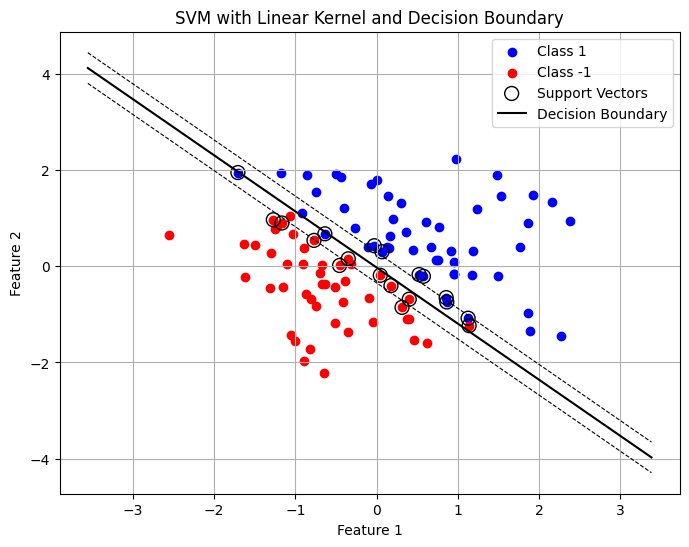

In [ ]:

# Plotting
plt.figure(figsize=(8, 6))

# Plot the data
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', label='Class 1')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', label='Class -1')

# Plot support vectors
#support vectors are the training samples that lie on or within the margin — and determine the decision boundary.
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Get the separating hyperplane
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]

# Equation: w0*x + w1*y + b = 0 → y = -(w0*x + b)/w1
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]
margin = 1 / np.linalg.norm(w)
y_margin_up = y_vals + margin
y_margin_down = y_vals - margin

# Plot hyperplane and margins
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_margin_up, 'k--', linewidth=0.8)
plt.plot(x_vals, y_margin_down, 'k--', linewidth=0.8)

plt.legend()
plt.title('SVM with Linear Kernel and Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()